<a href="https://colab.research.google.com/github/leenu10/DataScienceAnalytics/blob/main/Week14_Q%26A_UsArrests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv('/content/USArrests.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
data = data.rename(columns={'Unnamed: 0':'State'})
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
data_unl = data.iloc[:, 1:5]
data_unl.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
data_unl.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
data_unl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [ ]:
data_unl.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


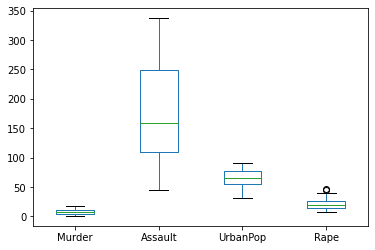

In [ ]:
data_unl.plot(kind='box')

Since there are large variation in the quantity, scaling mist be done.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

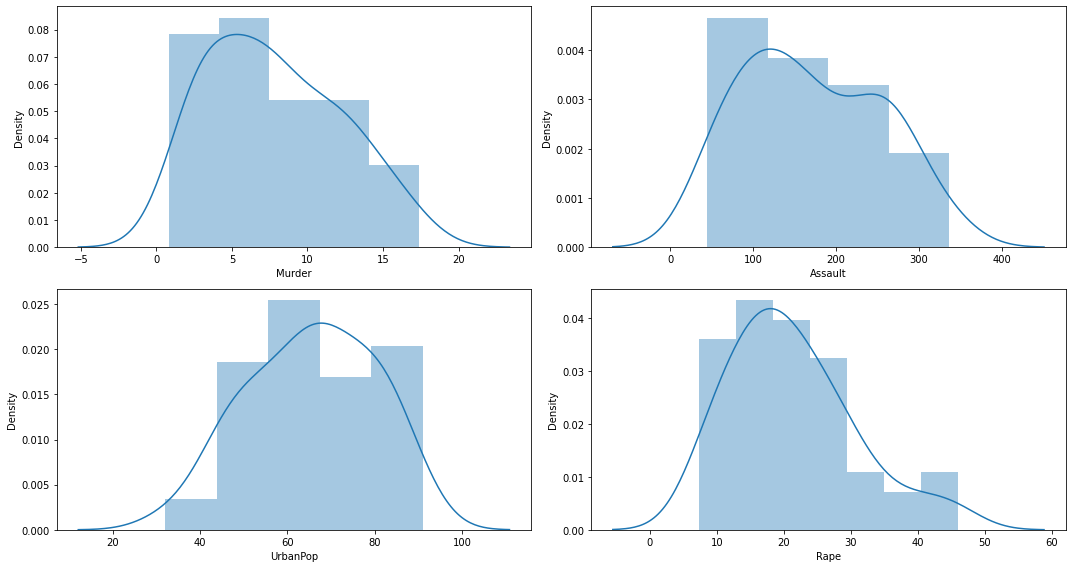

In [ ]:
plt.figure(figsize=(15,8))

i=0
for col in data_unl.columns:
  i+=1
  plt.subplot(2,2,i)
  sns.distplot(data_unl[col])
  plt.tight_layout()

# Before PCA

## KMeans

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1,10):
  model = KMeans(n_clusters = k)
  model.fit(data_unl)
  inertia.append(model.inertia_)

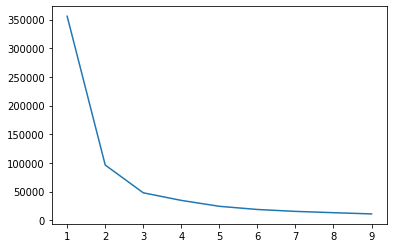

In [ ]:
plt.plot(range(1,10), inertia)

Form the elbow graph, the optimal no.of clusters is 3, since after 3 the slanting or the decrease in wcss is negligible.

In [ ]:
#sc = StandardScaler()
model = KMeans(n_clusters = 3)
#pipe = make_pipeline(sc, model)
#pipe.fit(data_unl)
#label_pred = pipe.predict(data_unl)
model.fit(data_unl)
label_pred = model.predict(data_unl)
print(label_pred)

[2 2 2 0 2 0 1 2 2 0 1 1 2 1 1 1 1 2 1 2 0 2 1 2 0 1 1 2 1 0 2 2 2 1 1 0 0
 1 0 2 1 0 0 1 1 0 0 1 1 0]


In [ ]:
model.inertia_

47964.26535714285

In [ ]:
data_unl.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

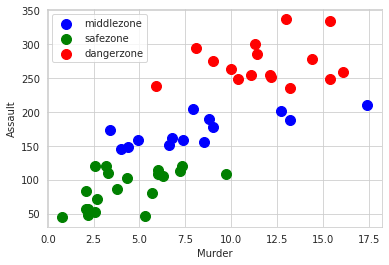

In [ ]:
x = data_unl.values
plt.scatter(x[label_pred==0, 0], x[label_pred==0, 1], s=100, c='blue', label='middlezone')
plt.scatter(x[label_pred==1, 0], x[label_pred==1, 1], s=100, c='green', label='safezone')
plt.scatter(x[label_pred==2, 0], x[label_pred==2, 1], s=100, c='red', label='dangerzone')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

## Hierarchical clustering

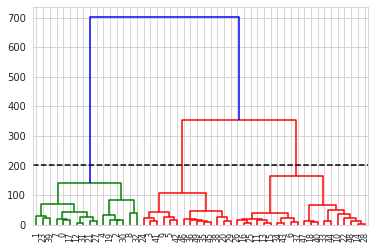

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data_unl, method='ward')
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(200, 0, 1000, linestyles='dashed')
plt.show()

In [ ]:
scaled_data_unl = sc.fit_transform(data_unl)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label_pred_ac = ac.fit_predict(data_unl)
label_pred_ac

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

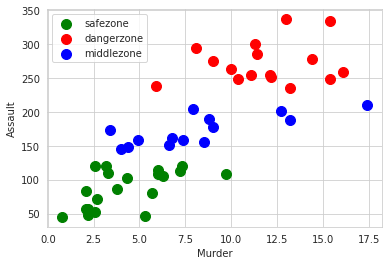

In [ ]:
plt.scatter(x[label_pred_ac==0, 0], x[label_pred_ac==0, 1], s=100, c='green', label='safezone')
plt.scatter(x[label_pred_ac==1, 0], x[label_pred_ac==1, 1], s=100, c='red', label='dangerzone')
plt.scatter(x[label_pred_ac==2, 0], x[label_pred_ac==2, 1], s=100, c='blue', label='middlezone')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

# After PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_unl)
data_pca.shape

(50, 2)

In [ ]:
data_pca

array([[  64.80216368,   11.4480074 ],
       [  92.82745016,   17.9829427 ],
       [ 124.06821629,   -8.83040304],
       [  18.34003541,   16.70391138],
       [ 107.42295313,  -22.52006977],
       [  34.97598596,  -13.71958403],
       [ -60.88728193,  -12.93253016],
       [  66.73102545,   -1.3537978 ],
       [ 165.24437032,   -6.27469007],
       [  40.53517659,    7.29023959],
       [-123.53610577,  -24.29120791],
       [ -51.79700225,    9.46919099],
       [  78.9920973 ,  -12.89706046],
       [ -57.55096073,   -2.84626471],
       [-115.5867897 ,    3.3421305 ],
       [ -55.78969411,   -3.15723392],
       [ -62.38318061,   10.67327147],
       [  78.27763132,    4.2949175 ],
       [ -89.26104427,   11.4878272 ],
       [ 129.3301355 ,    5.00703148],
       [ -21.26628263,  -19.45017903],
       [  85.45152667,   -5.9045567 ],
       [ -98.95481552,   -5.20960058],
       [  86.85635769,   27.42841963],
       [   7.98628867,   -5.2756414 ],
       [ -62.4836353 ,   

## KMeans

In [ ]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(data_pca)
label_pred_pca = model.predict(data_pca)
label_pred_pca

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0], dtype=int32)

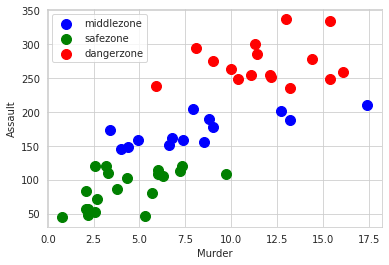

In [ ]:
plt.scatter(x[label_pred_pca==0, 0], x[label_pred_pca==0, 1], s=100, c='blue', label='middlezone')
plt.scatter(x[label_pred_pca==1, 0], x[label_pred_pca==1, 1], s=100, c='green', label='safezone')
plt.scatter(x[label_pred_pca==2, 0], x[label_pred_pca==2, 1], s=100, c='red', label='dangerzone')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

In [ ]:
label_pred_ac_pca = ac.fit_predict(data_pca)
label_pred_ac_pca

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

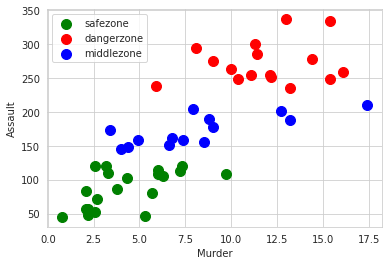

In [ ]:
plt.scatter(x[label_pred_ac_pca==0, 0], x[label_pred_ac_pca==0, 1], s=100, c='green', label='safezone')
plt.scatter(x[label_pred_ac_pca==1, 0], x[label_pred_ac_pca==1, 1], s=100, c='red', label='dangerzone')
plt.scatter(x[label_pred_ac_pca==2, 0], x[label_pred_ac_pca==2, 1], s=100, c='blue', label='middlezone')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

In [ ]:
data['Labels'] = label_pred_ac_pca
data[['State', 'Labels']]

,State,Labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [ ]:
danger_zone = data.groupby('Labels')['State'].unique()[1]
danger_zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [ ]:
moderate_zone = data.groupby('Labels')['State'].unique()[2]
moderate_zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

In [ ]:
safe_zone = data.groupby('Labels')['State'].unique()[0]
safe_zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)